In [4]:
import numpy as np #
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
km_103_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1JSOWPj_ez6I6zCxY7n0inTzuFmglj9Nt", delimiter=';', skiprows=2)
km_103_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Y6qgoX9OXN3MI2SNoxVdoWkBgF98Ynaa", delimiter=';', skiprows=2)

km_144_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1uylIY6Hk1h-R6YinvqqtgXDTf3VU7CQ_", delimiter=';', skiprows=2)
km_144_2022 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Bs6Xl0JWnx7gjK9Gbdr4gs9MqdQUOgiB", delimiter=';', skiprows=2)

km_154_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1Hy0YOgvFGLHX3i17VUBhFeiin6HTbKtd", delimiter=';', skiprows=2)
km_154_2016 = pd.read_csv("https://drive.google.com/uc?export=download&id=10s_Ta3MY_9ZLWo_ovKGJCJk8PGVb9NgX", delimiter=';', skiprows=2)

km_273_2019 = pd.read_csv("https://drive.google.com/uc?export=download&id=16uhgTGOzhFu83LU7YVffWhqMNaDIvmVM", delimiter=';', skiprows=2)
km_273_2018 = pd.read_csv("https://drive.google.com/uc?export=download&id=1IfGoBCjd0q35musS1JK3XGtj-h84M3cw", delimiter=';', skiprows=2)
km_273_2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1T8DVMbxqIBpi4FaKDwq5zxSLdNy7-MsT", delimiter=';', skiprows=2)

km_281_2023 = pd.read_csv("https://drive.google.com/uc?export=download&id=1S1ks-j47QjDJGatfqqOA1iD6xZP63yrp", delimiter=';', skiprows=2)
km_281_2022 = pd.read_csv("https://drive.google.com/uc?export=download&id=1LwzDYZL8ug3Mlk0NzBq3CA3JrZkRM05a", delimiter=';', skiprows=2)
km_281_2021 = pd.read_csv("https://drive.google.com/uc?export=download&id=1WdwPEeOS6ZqKEgANNDXE6c28Mr73Wk4u", delimiter=';', skiprows=2)

In [6]:
km_103_2017_2023 = pd.concat([km_103_2017, km_103_2023], axis=0)
km_144_2022_2023 = pd.concat([km_144_2023, km_144_2022], axis=0)
km_154_2016_2017 = pd.concat([km_154_2017, km_154_2016], axis=0)
km_273_2017_2019 = pd.concat([km_273_2019, km_273_2019, km_273_2019], axis=0)
km_281_2021_2023 = pd.concat([km_281_2023, km_281_2022, km_281_2021], axis=0)
dfs = [km_144_2022_2023]

In [7]:
def normalizar_datas(df):
    df['Hora'] = df['Hora'].astype(str).str.zfill(4)
    df['datetime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora'], format='%d/%m/%Y %M%H')
    df['hora'] = df['datetime'].dt.hour
    df['dia'] = df['datetime'].dt.day
    df['dia_semana'] = df['datetime'].dt.day_of_week
    df['mes'] = df['datetime'].dt.month
    df['ano'] = df['datetime'].dt.year

In [8]:
for df in dfs:
    df = normalizar_datas(df)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir o tema personalizado
sns.set_theme(        
    palette="dark",              
    font='sans-serif', 
    font_scale=1.3,
    rc={"axes.spines.right": False,  
        "axes.spines.top": False,    
        "figure.figsize": (10, 6),   
        "axes.facecolor": "#ede9e5",
        "figure.facecolor": "#ede9e5"
    }
)

# Aumentar a resolução das figuras
%config InlineBackend.figure_format = 'retina'

In [12]:
def grafico_sazional(df, km, nome_coluna, xlabel, nome_titulo):

    # Lista das colunas dos tipos de veículos
    veiculos = [
        '(A) Onibus/Cam de 2 eixos',
        '(B) Onibus/Cam de 3 eixos',
        '(C) Caminhao de 4 eixos',
        '(D) Caminhao de 5 eixos',
        '(E) Caminhao de 6 eixos',
        '(F) Caminhao de 7 eixos',
        '(G) Caminhao de 8 eixos',
        '(H) Caminhao de 9 eixos',
        '(I) Passeio',
        '(J) Motocicleta',
        '(L) Indefinido'
    ]
    
    # Agrupa por hora e sentido, somando os veículos
    df_agrupado = df.groupby([nome_coluna, 'Sentido'])[veiculos].mean().reset_index()
    
    # Transforma em formato "long" para facilitar o uso do seaborn
    df_melted = df_agrupado.melt(
        id_vars=[nome_coluna, 'Sentido'],
        value_vars=veiculos,
        var_name='Tipo de Veículo',
        value_name='Média'
    )
    
    # Cria o gráfico
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=df_melted, x=nome_coluna, y='Média', hue='Tipo de Veículo', style='Sentido')
    
    plt.title(f'Sazonalidade {nome_titulo} por tipo de veículo e sentido da via do km {km}')
    plt.xlabel(xlabel)
    plt.ylabel('Média de veículos horária')
    plt.xticks(df[nome_coluna].unique())
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


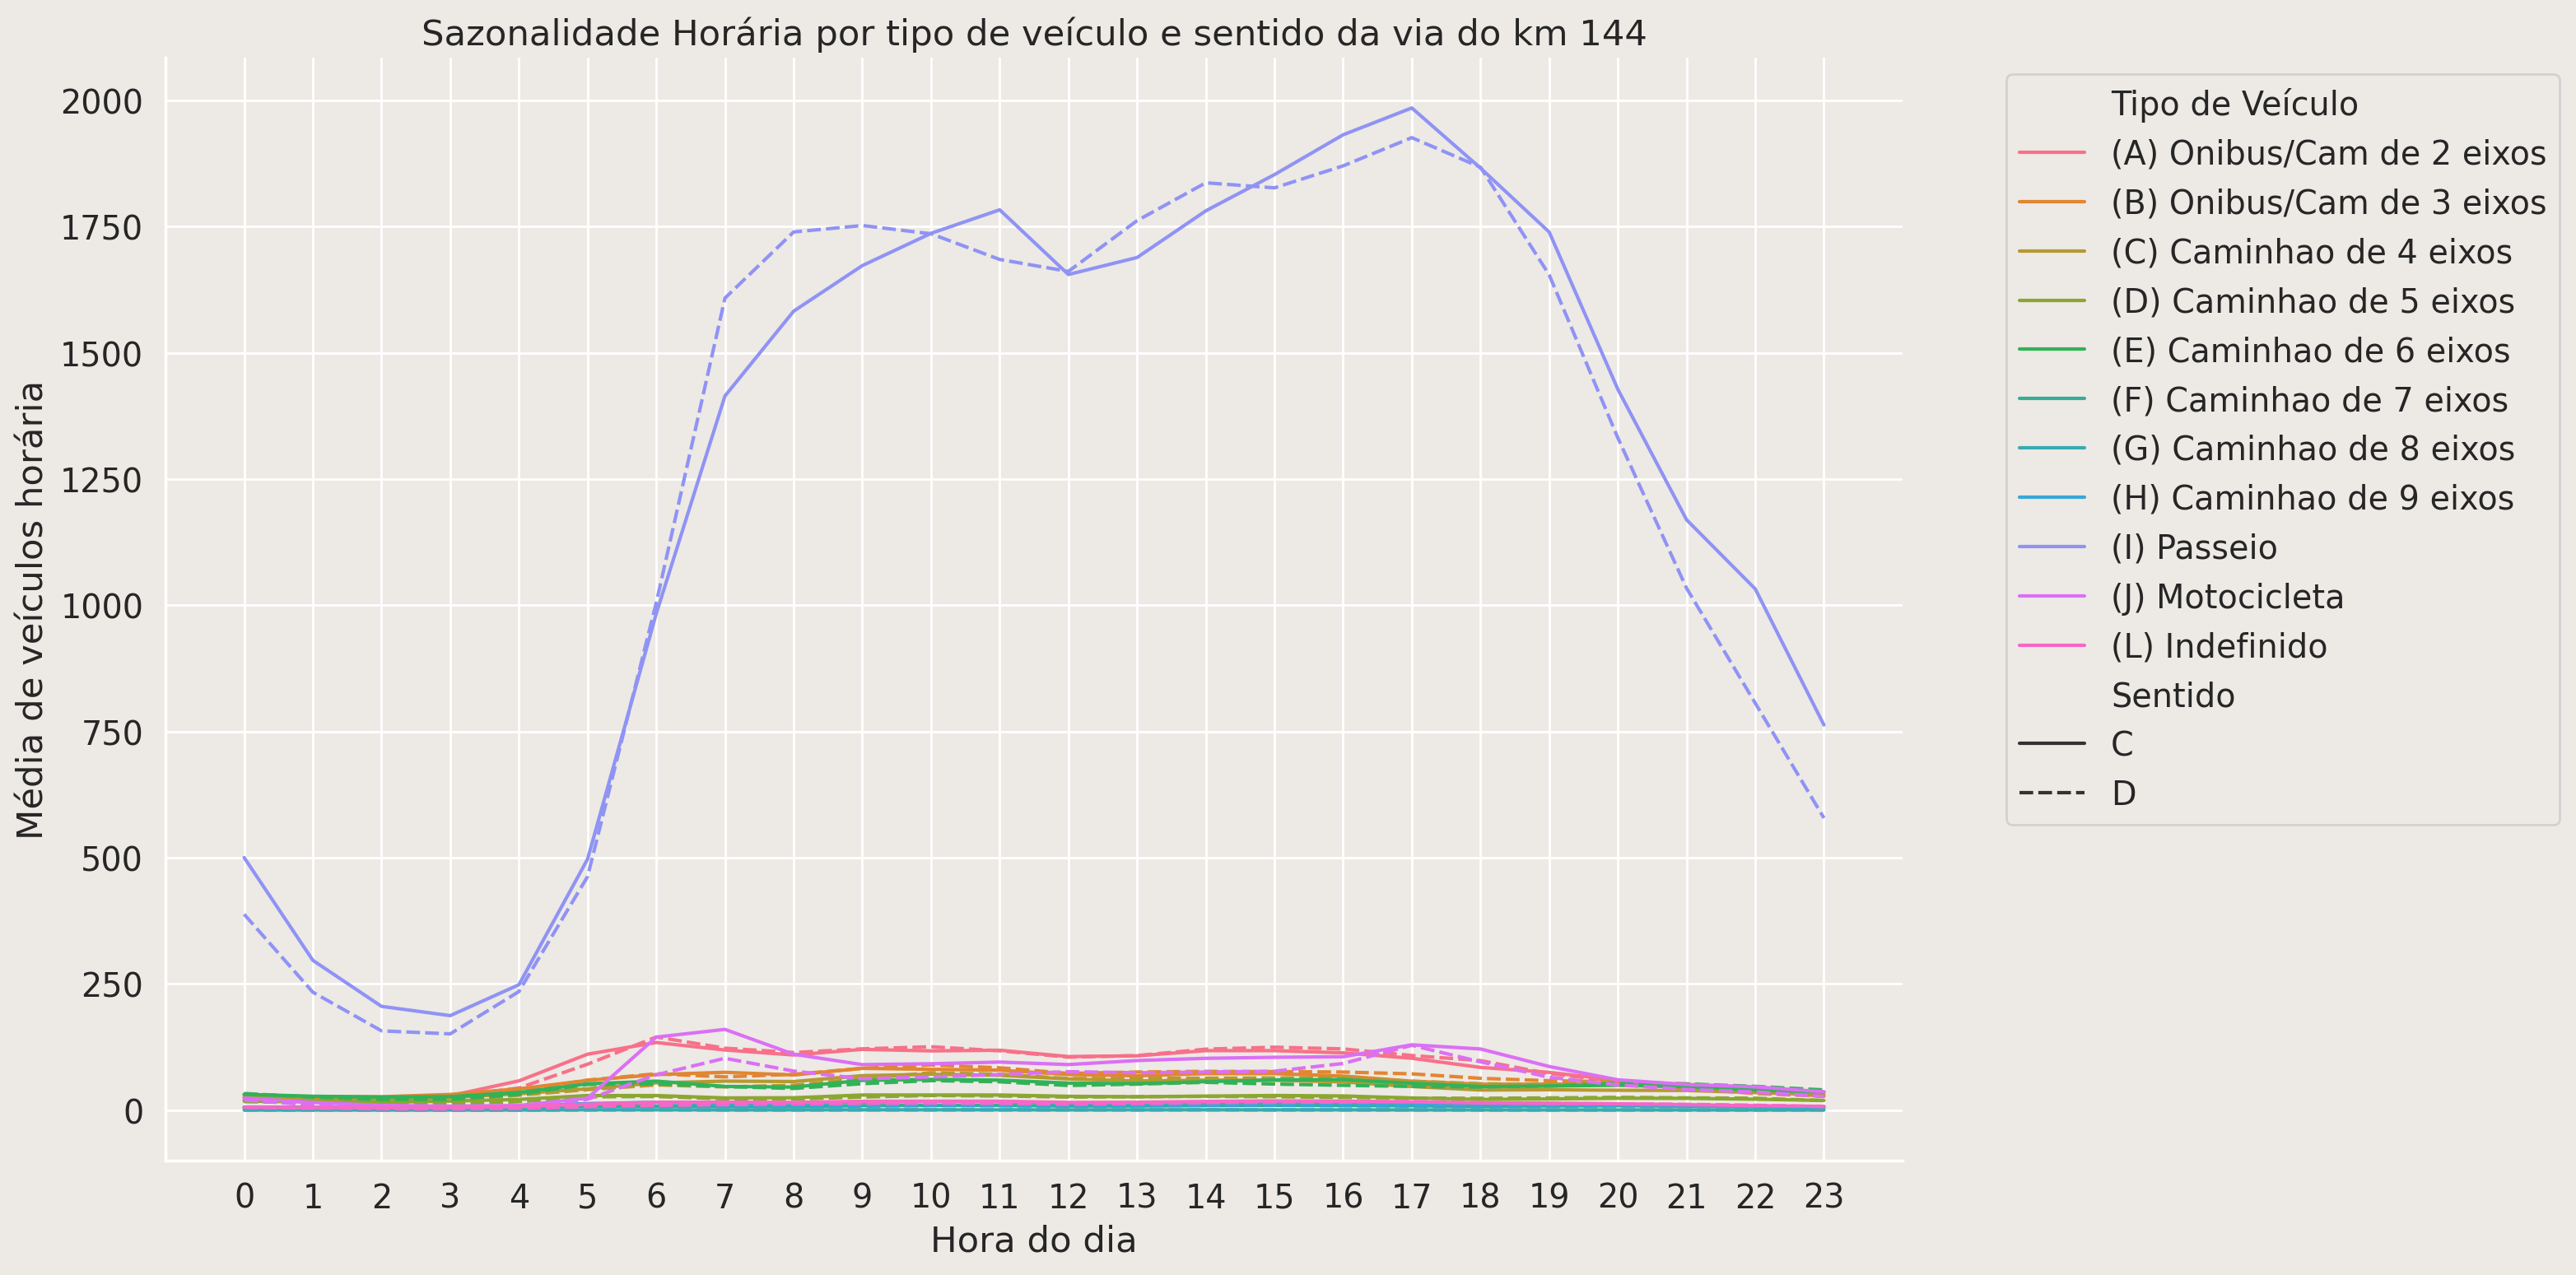

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


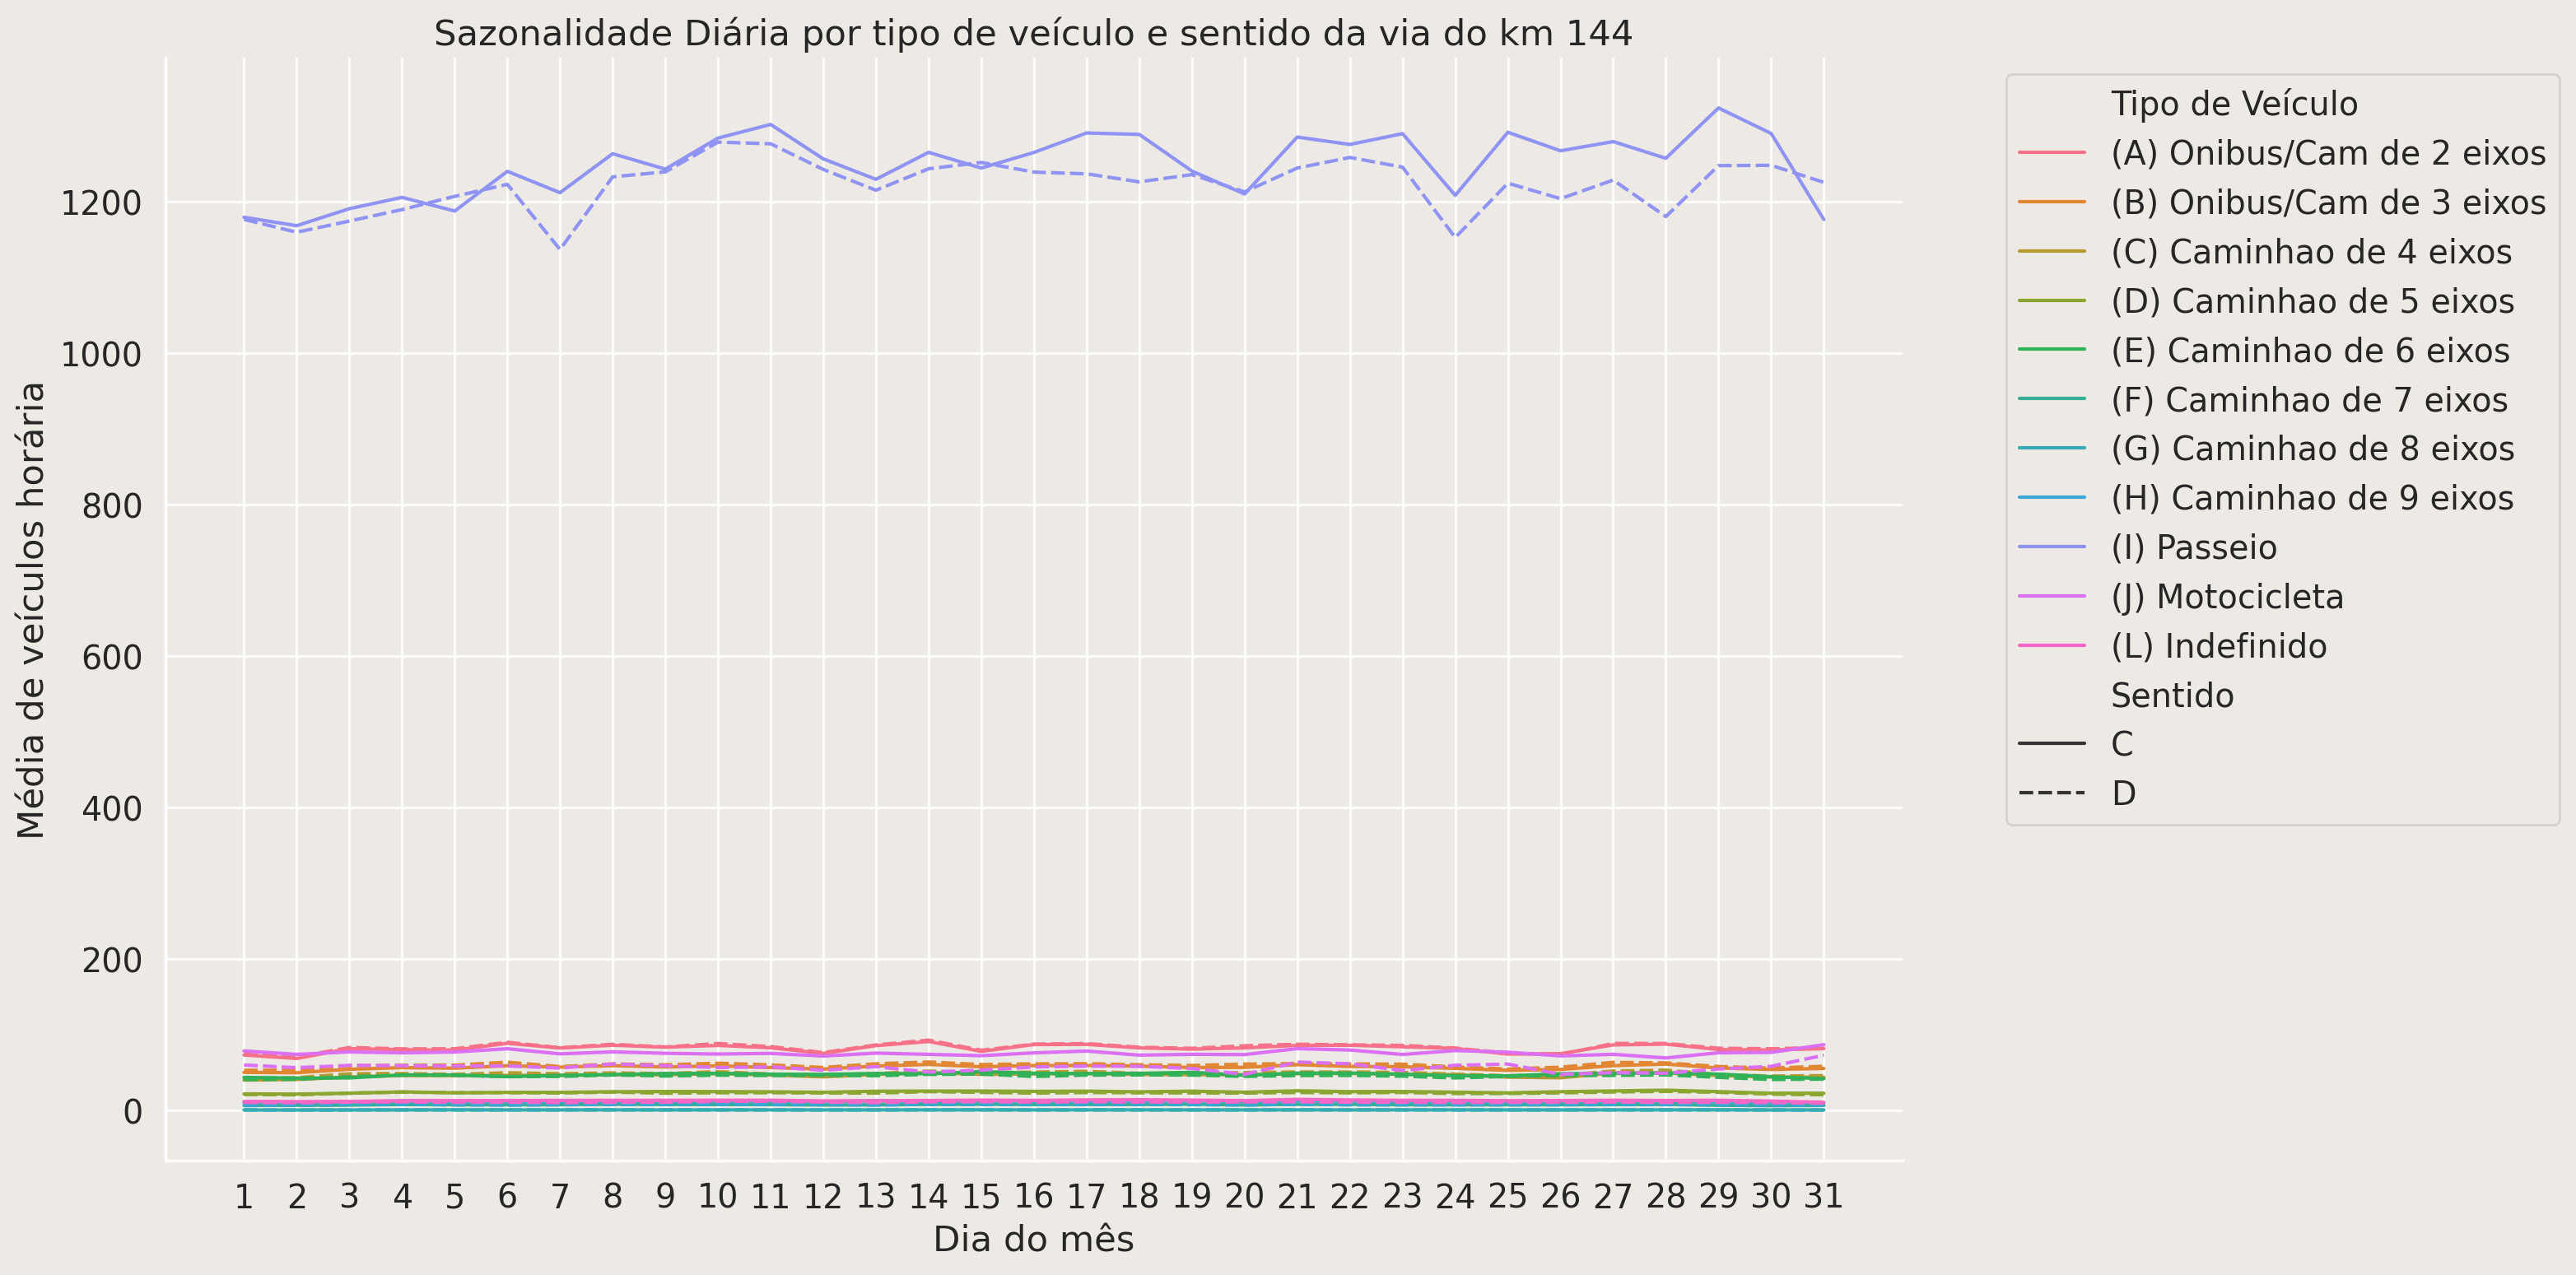

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


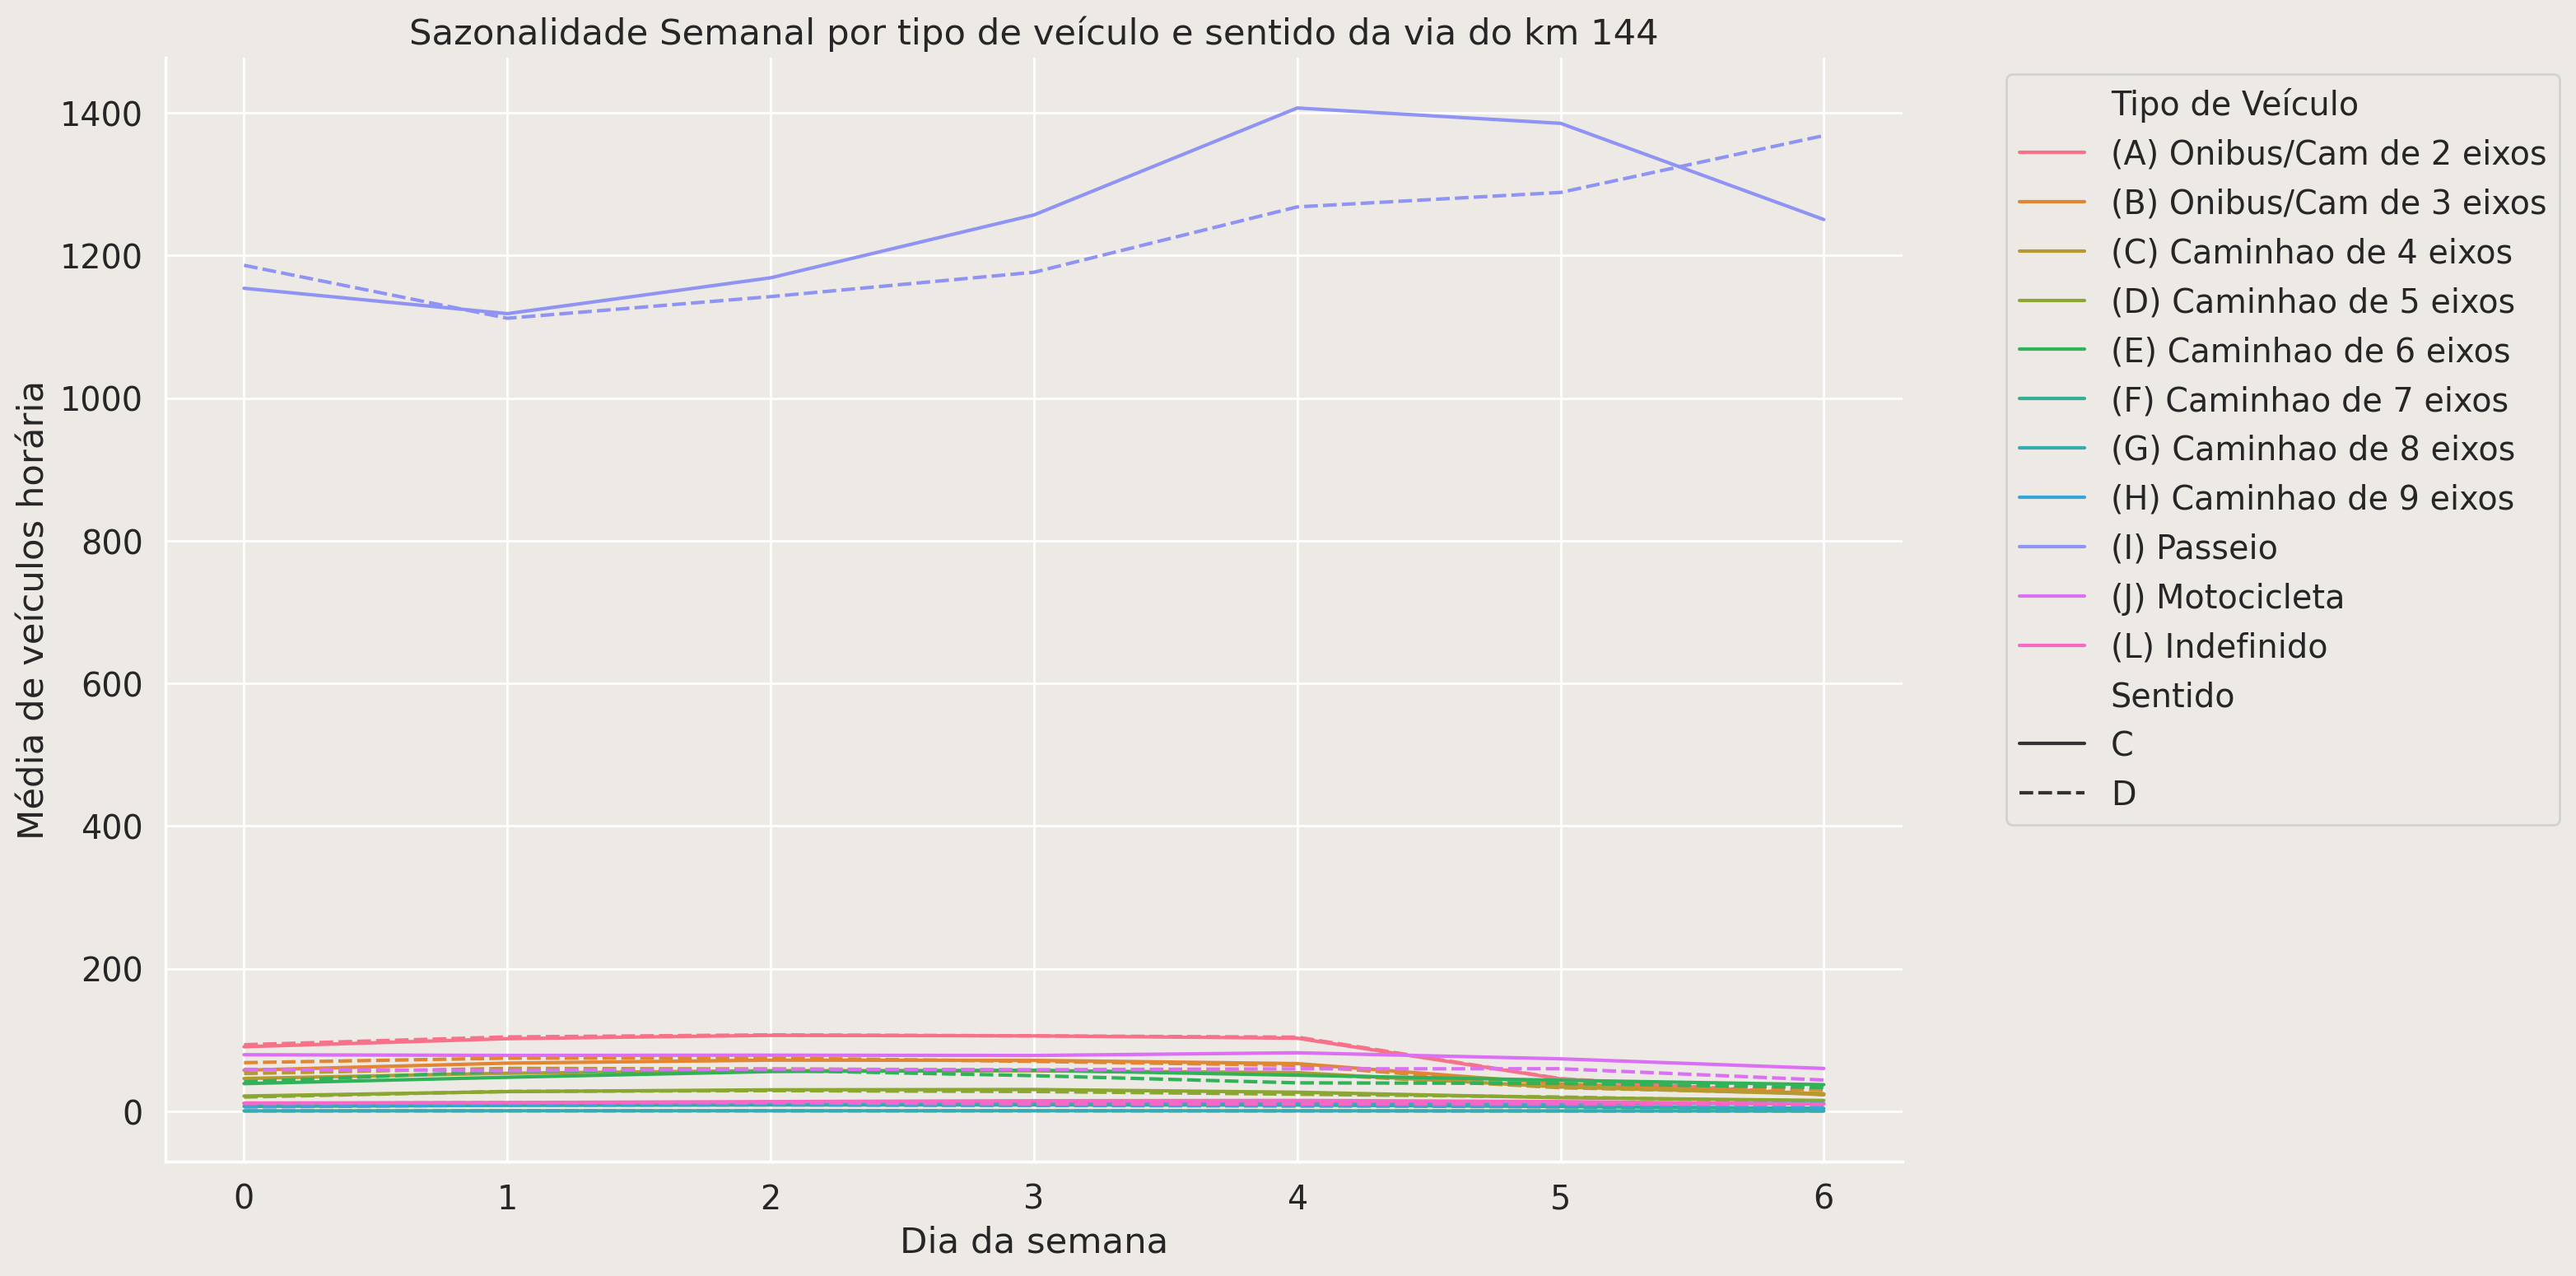

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


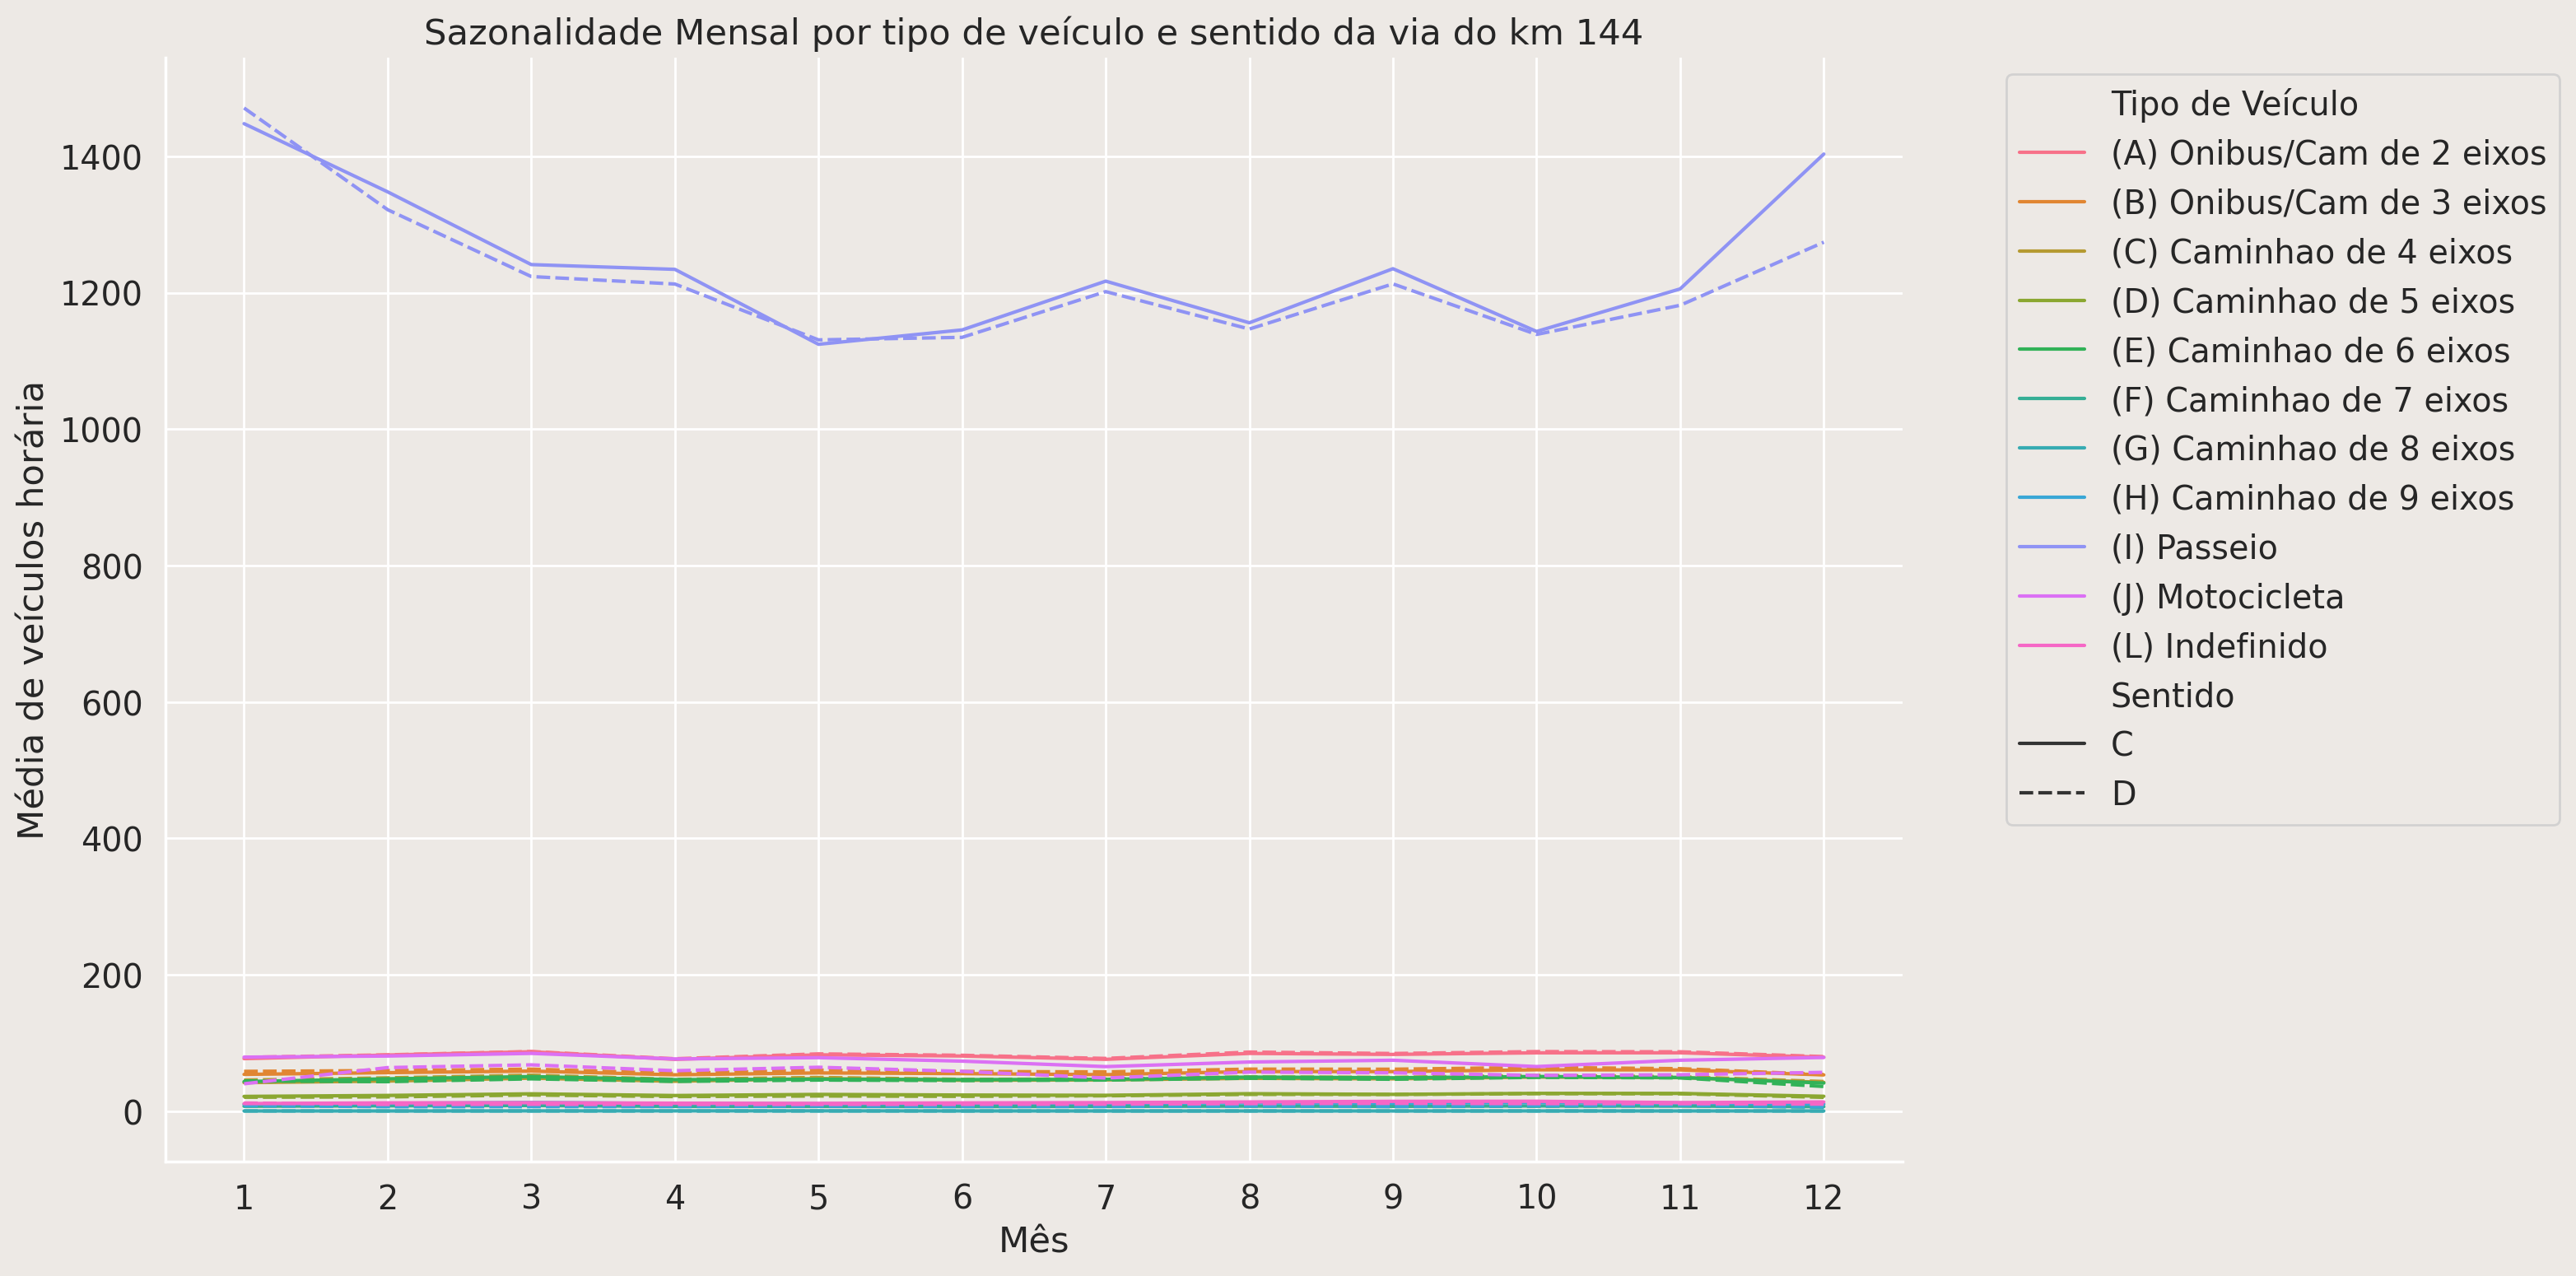

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


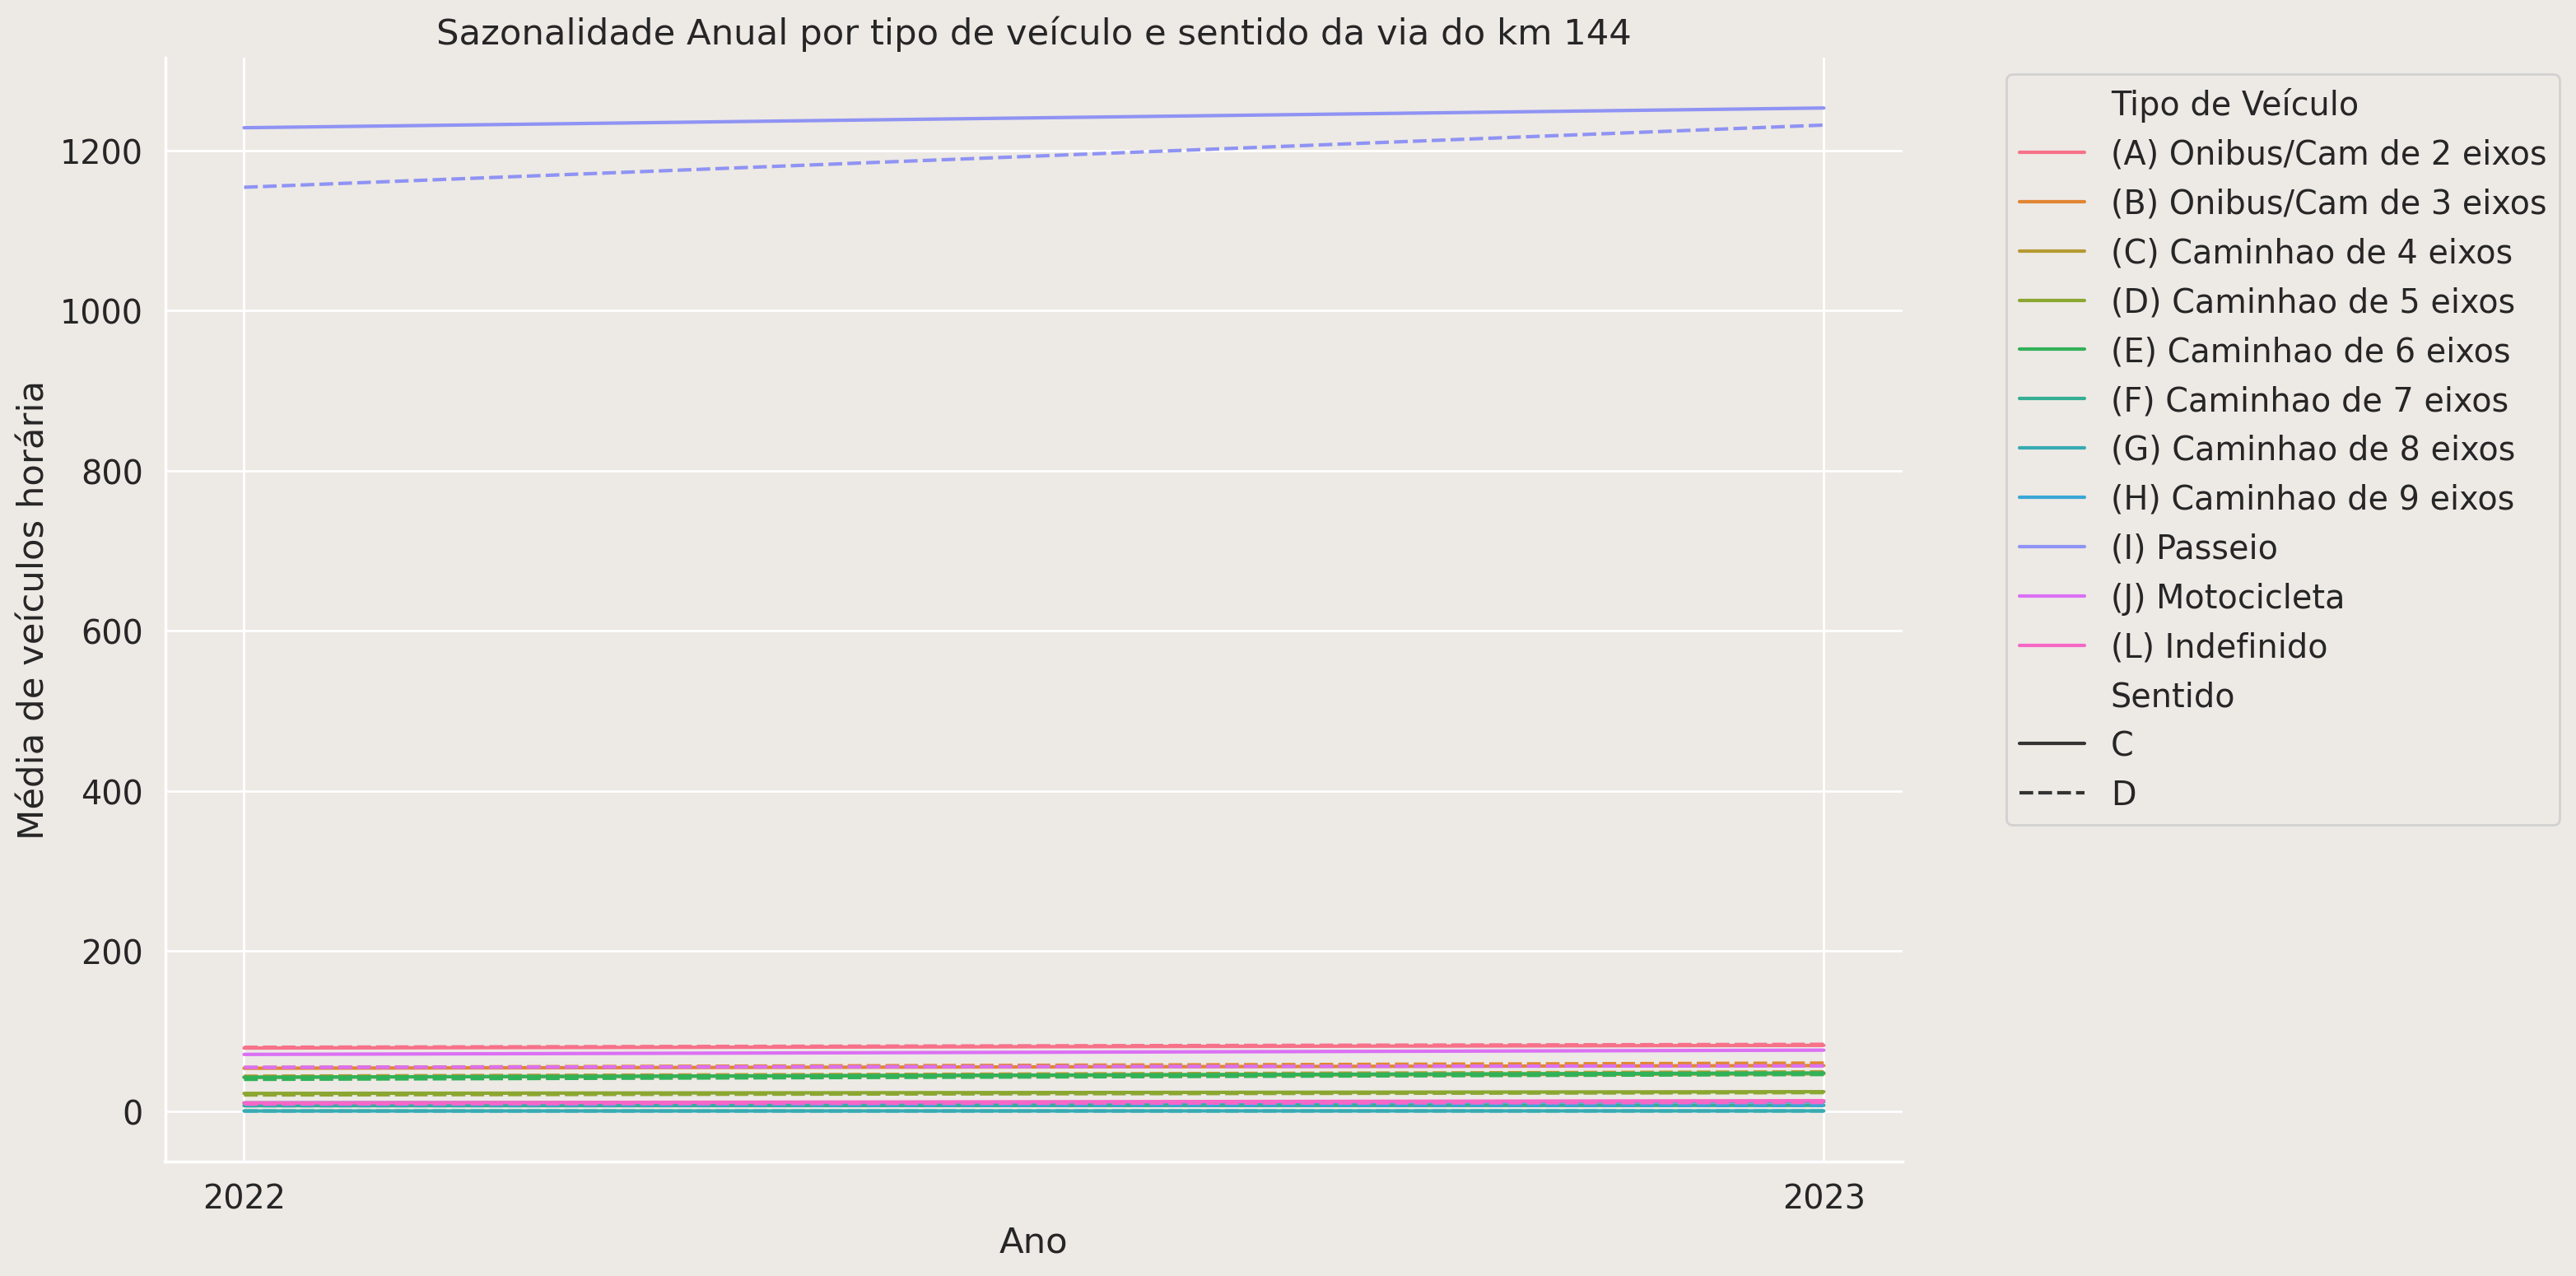

In [13]:
tempos = [
    ['hora', 'Hora do dia', 'Horária'],
    ['dia', 'Dia do mês', 'Diária'],
    ['dia_semana', 'Dia da semana', 'Semanal'],
    ['mes', 'Mês', 'Mensal'],
    ['ano', 'Ano', 'Anual']
]

#km = ['103', '144', '154', '273', '281']
km = ['144']

for df, km in zip(dfs, km):
    for tempo in tempos:
        grafico_sazional(df, km, tempo[0], tempo[1], tempo[2])